<a href="https://colab.research.google.com/github/Maansi-1590/Aerial-Object-Project/blob/main/Aerial_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ▣ Check GPU
!nvidia-smi

# ▣ Install Required Libraries
!pip install tensorflow keras matplotlib seaborn scikit-learn
!pip install ultralytics
!pip install streamlit

/bin/bash: line 1: nvidia-smi: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/classification_dataset-20251124T102657Z-1-001/"

In [ ]:
!ls $dataset_path

classification_dataset


In [ ]:
dataset_path = "/content/drive/MyDrive/classification_dataset-20251124T102657Z-1-001/classification_dataset/"

In [ ]:
!ls $dataset_path

test  train  valid


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "valid",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 2662 files belonging to 2 classes.
Found 442 files belonging to 2 classes.
Found 215 files belonging to 2 classes.


In [ ]:
print(train_ds.class_names)

['bird', 'drone']


In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

Build a custom CNN Model

In [ ]:
from tensorflow.keras import layers, models

num_classes = 2

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # <--- input shape here
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=20,
    callbacks=[checkpoint, earlystop]
)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5600 - loss: 0.9232

84/84 ━━━━━━━━━━━━━━━━━━━━ 423s 5s/step - accuracy: 0.5608 - loss: 0.9206 - val_accuracy: 0.6900 - val_loss: 0.5787
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7292 - loss: 0.5379

84/84 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.7295 - loss: 0.5377 - val_accuracy: 0.7330 - val_loss: 0.5130
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7663 - loss: 0.4619

84/84 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.7665 - loss: 0.4616 - val_accuracy: 0.7873 - val_loss: 0.4339
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8513 - loss: 0.3467

84/84 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.8513 - loss: 0.3467 - val_accuracy: 0.7986 - val_loss: 0.4682
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8585 - loss: 0.3336

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.8566 - loss: 0.3415
Test Accuracy: 0.8325581550598145


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Get predicted labels
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_ds.class_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 860ms/step
Confusion Matrix:
[[77 44]
 [60 34]]
Classification Report:
              precision    recall  f1-score   support

        bird       0.56      0.64      0.60       121
       drone       0.44      0.36      0.40        94

    accuracy                           0.52       215
   macro avg       0.50      0.50      0.50       215
weighted avg       0.51      0.52      0.51       215



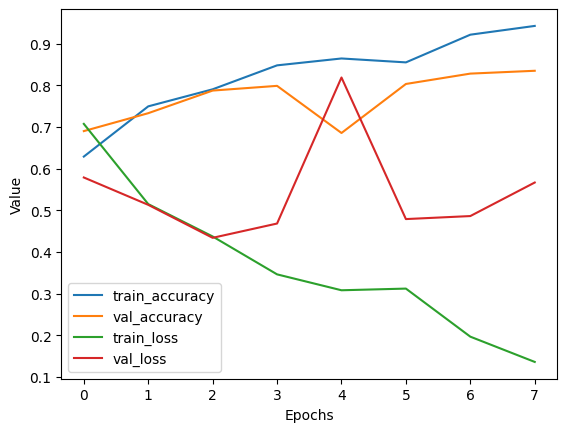

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
model.save("aerial_classification_model.keras")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("aerial_classification_model.keras")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8238 - loss: 0.3546
Test Accuracy: 0.8325581550598145


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_ds.class_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
Confusion Matrix:
[[78 43]
 [59 35]]
Classification Report:
              precision    recall  f1-score   support

        bird       0.57      0.64      0.60       121
       drone       0.45      0.37      0.41        94

    accuracy                           0.53       215
   macro avg       0.51      0.51      0.51       215
weighted avg       0.52      0.53      0.52       215



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


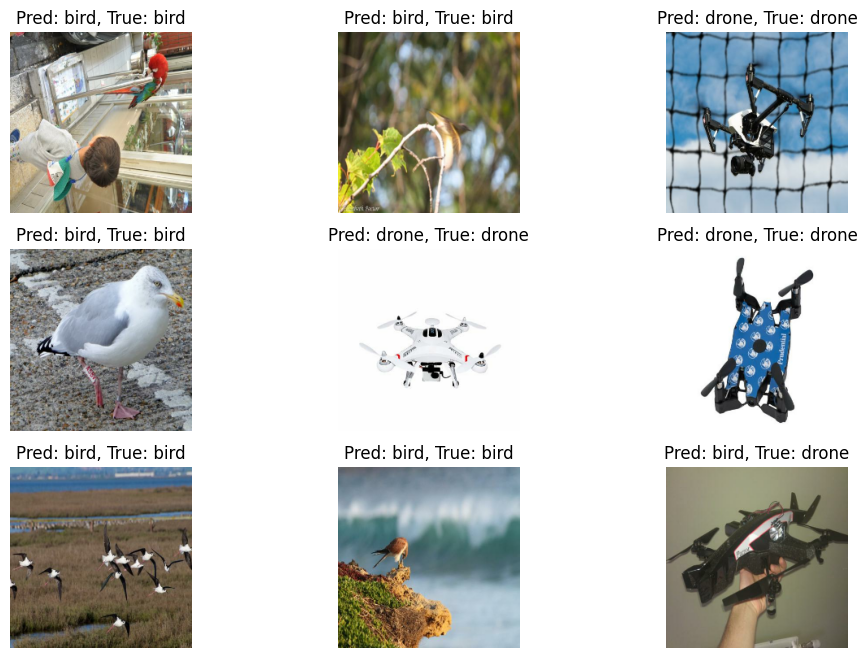

In [ ]:
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    preds = np.argmax(model.predict(images), axis=1)
    plt.figure(figsize=(12,8))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {train_ds.class_names[preds[i]]}, True: {train_ds.class_names[labels[i]]}")
        plt.axis("off")
    plt.show()

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py

Writing app.py


In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

model = load_model("aerial_classification_model.keras")

st.title("Bird vs Drone Classifier")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
    img = Image.open(uploaded_file).resize((224,224))
    img_array = np.expand_dims(np.array(img)/255.0, axis=0)
    pred = np.argmax(model.predict(img_array))
    st.image(img, caption=f"Prediction: {model.class_names[pred]}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-11-28 08:02:57.200 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:02:58.063 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-28 08:02:58.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:02:58.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:02:58.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:02:58.085

In [ ]:
import streamlit as st
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# -----------------------------
# ⚙️ Load Model
# -----------------------------
MODEL_PATH = "aerial_classification_model.keras"
model = load_model(MODEL_PATH)

CLASS_NAMES = ["Bird", "Drone"]

# -----------------------------
# 📌 Prediction Function
# -----------------------------
def classify_image(image):

    img = image.resize((224, 224))  # Resize to model input
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    class_id = np.argmax(prediction)
    confidence = float(np.max(prediction))

    return CLASS_NAMES[class_id], confidence


# -----------------------------
# 🎨 Streamlit UI
# -----------------------------
st.set_page_config(page_title="Bird vs Drone Classifier", layout="centered")

st.title("🦅 Bird vs Drone Classification")
st.write("Upload an image to classify whether it contains a **Bird** or a **Drone**.")

uploaded_file = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])

if uploaded_file:

    # Show uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    st.markdown("---")

    # Run classification
    if st.button("Classify Image"):
        label, confidence = classify_image(image)

        st.success(f"**Prediction:** {label}")
        st.info(f"**Confidence:** {confidence * 100:.2f}%")

else:
    st.info("Please upload an image to start.")

2025-11-28 08:03:01.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:03:01.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:03:01.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:03:01.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:03:01.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:03:01.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:03:01.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 08:03:01.641 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

--2025-11-28 08:03:20--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2025-11-28 08:03:20--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-28T08%3A45%3A15Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-28

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://phones-firm-ebooks-hockey.trycloudflare.com
